# Final Project 

By Ashley Snell, Jeremy Taylor, Sydney Small



## Content Knowledge:


In [17]:
import pandas as pa
import numpy as np
import numpy.random as rn
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.colors as pltco

druguser = pa.read_csv("drug_consumption.csv", names = ['ID',
'Age',
'Gender',
'Education',
'Country',
'Ethnicity',
'Nscore',
'Escore',
'Oscore',
'Ascore',
'Cscore',
'Impulsive',
'SS',
'Alcohol',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Cannabis',
'Choc',
'Coke',
'Crack',
'Ecstasy',
'Heroin',
'Ketamine',
'Legalh',
'LSD',
'Meth',
'Mushrooms',
'Nicotine',
'Semer',
'VSA'])

druguser.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


## Data Manipluation: 


In [18]:
names = {'CL0':0,'CL1':0,'CL2':0,'CL3':0,'CL4':1,'CL5':1,'CL6':1,0:0, 1:1} #only counting people who used in last month as users.
druguser.Cannabis = druguser.Cannabis.map(names)
druguser.Semer = druguser.Semer.map(names)
druguser.Nicotine = druguser.Nicotine.map(names)
druguser.LSD = druguser.LSD.map(names)
druguser.Mushrooms = druguser.Mushrooms.map(names)
druguser.Ecstasy = druguser.Ecstasy.map(names)
druguser.Coke = druguser.Coke.map(names)
druguser.Alcohol = druguser.Alcohol.map(names)

In [19]:
def plot_cat_model(clf, X_train, y_train, X_test, y_test):

    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 0.25, X_train[:, 0].max() + 0.25
    y_min, y_max = X_train[:, 1].min() - 0.25, 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [34]:
def Bootstrap(clf2):
    num = 50 
    Xboot = [0]*num
    yboot = [0]*num

    n = X.shape[0]
    for s in range(num):
        sample = np.random.randint(0, n, n) 
        Xboot[s] = X[sample, :]
        yboot[s] = y[sample]

    test = int(0.20*n)

    labels = ['train','test']

    Error = pa.DataFrame(  np.array([0]*num*2).reshape(num, 2), columns = labels)

    for s in range(num):
        X_test = Xboot[s][:test]
        y_test = yboot[s][:test]
        X_train = Xboot[s][test:]
        y_train = yboot[s][test:]
    
        clf2.fit(X_train, y_train)
        Error.iloc[s, 0] = clf2.score(X_train, y_train) 
        Error.iloc[s, 1] = clf2.score(X_test, y_test)
      
    Error_mean = [0]*2
    Error_std = [0]*2
    for c in range(2):
        Error_mean[c] = np.mean(Error.iloc[:num, c])
        Error_std[c] = np.std(Error.iloc[:num, c])
    
    Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
    Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
    Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
    print(Error.tail())
   

## Logistic Regression:


In [35]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [36]:
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression(solver='lbfgs')
lgreg.fit(X_train[:,1].reshape(-1,1), y_train);

In [37]:
b, m = *lgreg.intercept_, *lgreg.coef_[0]
b, m

(-0.35067839600983647, -0.5717032039451115)

Logistic Regression Decsion Intercept -0.35067839600983647
Logistic Regression Coefficent -0.5717032039451115


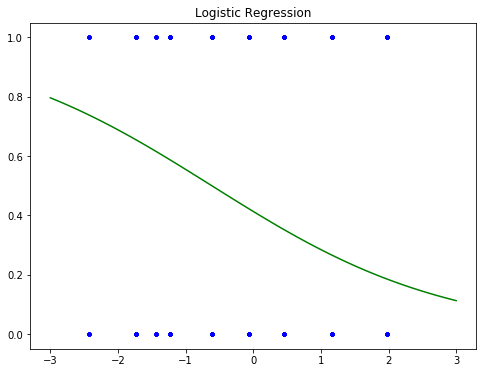

In [38]:
plt.figure(figsize = (8, 6))
plt.plot(X_train[:,1], y_train, 'b.')
xx = np.linspace(-3, 3, 100)
yy = np.exp(m*xx+b)/(1 + np.exp(m*xx+b))
plt.plot(xx, yy, 'g-');
plt.title ("Logistic Regression")
print("Logistic Regression Decsion Intercept",b)
print("Logistic Regression Coefficent",m)

markdown explaining logistric regression for this 

In [39]:
keep = ['Age', 'Country', 'Education', 'Gender', 'Ascore', 
         'Cscore', 'Escore', 'Nscore', 'Oscore', 'Ethnicity','Impulsive','SS']
X = np.array(druguser[ keep])
y = np.array(druguser['Cannabis'])
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()


In [40]:
lgreg.fit(X_train[:,1].reshape(-1,1), y_train);
b, m = *lgreg.intercept_, *lgreg.coef_[0]
print("Logistic Regression Decsion Intercept",b)
print("Logistic Regression Coefficent",m)

Logistic Regression Decsion Intercept -0.35067839600983647
Logistic Regression Coefficent -0.5717032039451115


markdown for logistic showing keep variables-- cant graph. Trash

## K-nearest neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Knear = KNeighborsClassifier(n_neighbors=100) # Define the model
Knear.fit(X_train, y_train); # Train the model


Training Error: 0.7327586206896551
Testing Error: 0.7374005305039788


Text(0.5, 1.0, 'K-nearest neighbors')

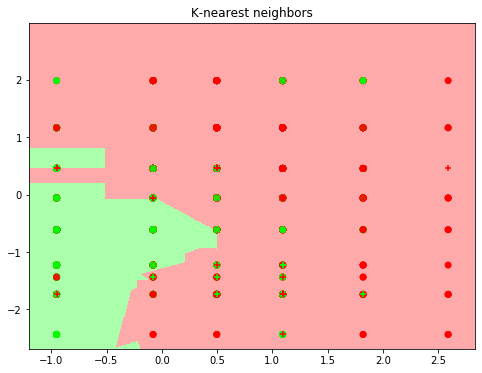

In [43]:
plot_cat_model(Knear, X_train, y_train, X_test, y_test)
plt.title ("K-nearest neighbors")

markdown for k nearest-- more flexible model. overfit the model. 
boot strap changing number of neighbors

In [44]:
X = np.array(druguser[ keep])
y = np.array(druguser[['Cannabis']]).reshape(-1)

num = 10 
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n) 
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

test = int(0.20*n)
maxk = 20

labels = [ ['train_{}'.format(x), 'test_{}'.format(x)] for x in range(1, maxk+1)]
labels = [x for sublist in labels for x in sublist]

Error = pa.DataFrame(  np.array([0]*num*2*maxk).reshape(num, 2*maxk), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    for k in range(maxk):
        clf = KNeighborsClassifier(n_neighbors=k+1) 
        clf.fit(X_train, y_train) 
        Error.iloc[s, 2*k] = clf.score(X_train, y_train) 
        Error.iloc[s, 2*k+1] = clf.score(X_test, y_test)
      
Error_mean = [0]*2*maxk
Error_std = [0]*2*maxk
for c in range(2*maxk):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()

,train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4,train_5,test_5,...,train_16,test_16,train_17,test_17,train_18,test_18,train_19,test_19,train_20,test_20
7,1.0,0.824934,0.933024,0.758621,0.917109,0.766578,0.870690,0.750663,0.864721,0.774536,...,0.827586,0.782493,0.819629,0.777188,0.818966,0.771883,0.820292,0.769231,0.816976,0.782493
8,1.0,0.856764,0.938329,0.809019,0.917772,0.819629,0.883952,0.811671,0.885942,0.803714,...,0.837533,0.806366,0.843501,0.811671,0.827586,0.809019,0.834218,0.811671,0.820955,0.801061
9,1.0,0.867374,0.930371,0.777188,0.909151,0.777188,0.874005,0.761273,0.875995,0.803714,...,0.822944,0.798408,0.813660,0.795756,0.813660,0.801061,0.816313,0.798408,0.807029,0.803714
Mean,1.0,0.866578,0.933886,0.807162,0.913462,0.808753,0.875729,0.792838,0.872480,0.802918,...,0.823607,0.792573,0.822480,0.797082,0.819231,0.797347,0.821485,0.797347,0.818103,0.796817
Standard Deviation,0.0,0.024341,0.004518,0.030637,0.005232,0.028898,0.005714,0.029164,0.006999,0.027130,...,0.012028,0.020608,0.014238,0.019210,0.012656,0.020926,0.012837,0.018385,0.010265,0.019892


Text(0.5, 1.0, 'Difference between training and testing errors')

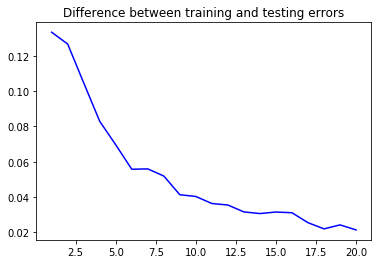

In [45]:
testing_error = np.array(Error_mean[1::2])
training_error = np.array(Error_mean[0::2])
s = abs(testing_error - training_error)
kk = range(1, maxk+1)
plt.plot(kk, s, 'b-');
plt.title ("Difference between training and testing errors")

Text(0.5, 1.0, 'Testing error vs k value')

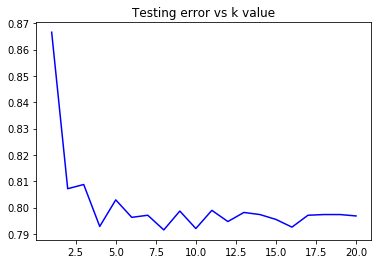

In [46]:
testing_error = Error_mean[1::2]
kk = range(1, maxk+1)
plt.plot(kk, testing_error, 'b-');
plt.title ("Testing error vs k value")

In [47]:
clf = KNeighborsClassifier(19)
Bootstrap(clf)

                       train      test
47                  0.827586  0.803714
48                  0.814987  0.816976
49                  0.826260  0.803714
Mean                0.817719  0.803183
Standard Deviation  0.009880  0.019398


markdown explaining bootstrap
PCA not includded- sucked

# Quadratic Discriminant Analysis

In [49]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Training Error: 0.7201591511936339
Testing Error: 0.8010610079575596


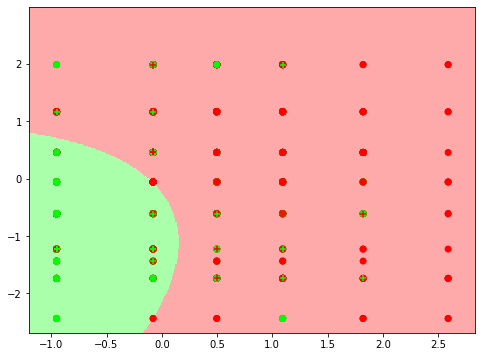

In [50]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)
plot_cat_model(QDA, X_train, y_train, X_test, y_test)

In [51]:
X = np.array(druguser[ keep])
y = np.array(druguser[['Cannabis']]).reshape(-1)

Bootstrap(QDA)

                       train      test
47                  0.804377  0.790451
48                  0.791777  0.793103
49                  0.818966  0.811671
Mean                0.808727  0.790875
Standard Deviation  0.012692  0.018040
